In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用 numpy 生成随机样本点
# 因为要使用的是 2-dim 数据，所以使用 np.newaxis 添加维度
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]  # 200-row 1-col
# 生成噪点，形状和 x_data 一致
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

In [3]:
# 定义占位符
# 形状：[None, 1] 表示 { 行不确定，1-col }
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [4]:
# 构建简单神经网络
# 样本数 m = 200
# 特征值 / 输入层 = 1
# 中间层 = 1层 10个神经元
# 输出层 = 1

In [5]:
# 定义中间层
Weight_L1 = tf.Variable(tf.random_normal([1,10])) # 输入层 1 / Hide_1 = 10
Biases_L1 = tf.Variable(tf.zeros([1, 10]))
Z_L1 = tf.matmul(x, Weight_L1) + Biases_L1  # matmul:矩阵乘法
Active_L1 = tf.nn.tanh(Z_L1)

In [6]:
# 定义输出层
Weight_L2 = tf.Variable(tf.random_normal([10, 1]))
Biases_L2 = tf.Variable(tf.zeros([1, 1]))         # 偏置个数 重点！
Z_L2 = tf.matmul(Active_L1, Weight_L2) + Biases_L2
Prediction = tf.nn.tanh(Z_L2)

In [7]:
# 定义代价函数、训练方法
loss = tf.reduce_mean(tf.square(y - Prediction))
lr = tf.Variable(0.2)

# train = tf.train.GradientDescentOptimizer(lr).minimize(loss)
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

0 0.2592539


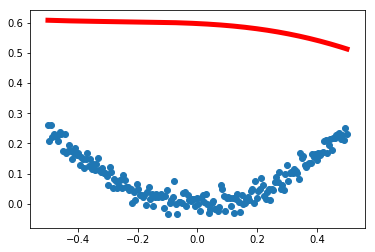

2000 0.0004854711


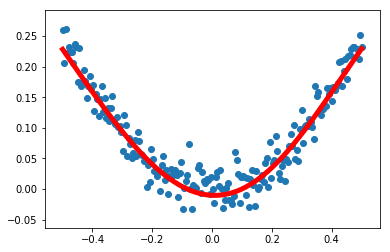

4000 0.00046431698


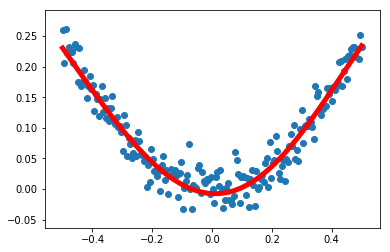

6000 0.00046773153


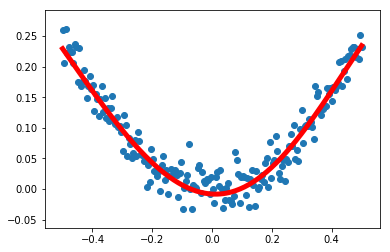

8000 0.00047657412


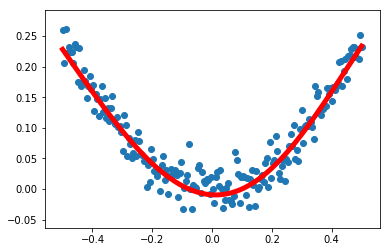

10000 0.00046278106


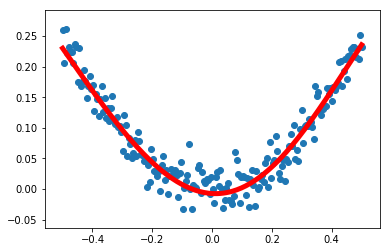

12000 0.0004699531


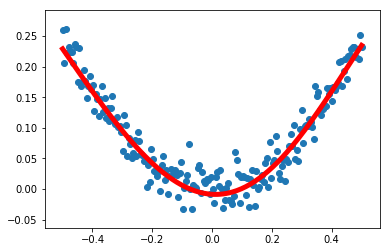

14000 0.00047048557


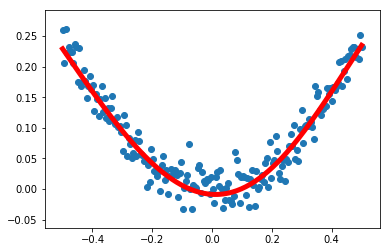

16000 0.00046202342


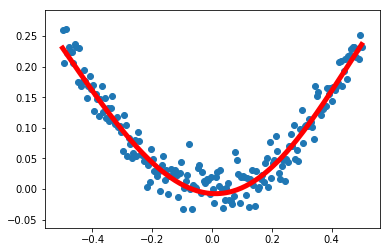

18000 0.00046924062


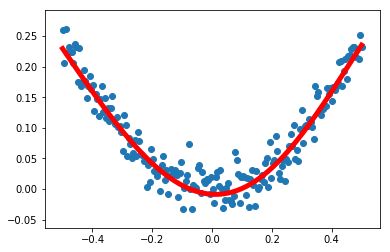

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(20000):
        sess.run(train, feed_dict={
            x:x_data,
            y:y_data
        })
        if step % 2000 == 0:
            print(step, sess.run(loss, feed_dict={y:y_data, x:x_data}))
            # 获取最终的预测值
            prediction_value = sess.run(Prediction, feed_dict={
                x:x_data
            })
            plt.figure()
            plt.scatter(x_data, y_data)
            plt.plot(x_data, prediction_value, 'r-', lw=5)
            plt.show()